Vaishnavi Dattatray Damare

## Oasis Infobyte Internship_Task 2

### Task 2- Sales Prediction  Using Python

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sea

In [2]:
df=pd.read_csv("C:/Users/damar/Desktop/Advertising.csv",index_col=0)
df.index.name = "S.no"

In [3]:
print('\033[1m' +' Datset for sales in Advertising:' + '\033[0m')
df

 Datset for sales in Advertising:


,TV,Radio,Newspaper,Sales
S.no,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
print("Random Rows: \n")
df.sample(5)

Random Rows: 



,TV,Radio,Newspaper,Sales
S.no,,,,
87,76.3,27.5,16.0,12.0
147,240.1,7.3,8.7,13.2
91,134.3,4.9,9.3,11.2
155,187.8,21.1,9.5,15.6
169,215.4,23.6,57.6,17.1


In [5]:
df.shape

(200, 4)

In [6]:
print("Names of columns in advertising sales prediction dataset are:\n\n", df.columns)

Names of columns in advertising sales prediction dataset are:

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [7]:
print('\033[1m' +' Information of Dataset' + '\033[0m\n\n')
df.info()

 Information of Dataset


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
print("Size of dataset is",df.size)

Size of dataset is 800


In [9]:
df1  = df.corr()
print("Correlation:\n")
df1

Correlation:



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
print("Statistics summary:\n")
df.describe()

Statistics summary:



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


[Text(0.5, 1.0, 'Heatmap of Correlated values')]

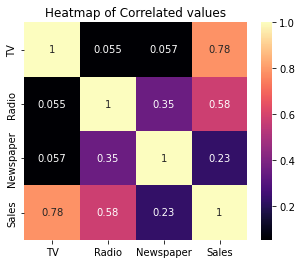

In [11]:
fig, ax = plt.subplots(figsize = (5,4))

sea.heatmap(df1, annot=True, cmap="magma").set(title='Heatmap of Correlated values')

In [12]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
df.duplicated().value_counts()

False    200
dtype: int64

In [14]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          TV  Radio  Newspaper  Sales
S.no                                
1     False  False      False  False
2     False  False      False  False
3     False  False      False  False
4     False  False      False  False
5     False  False      False  False
...     ...    ...        ...    ...
196   False  False      False  False
197   False  False      False  False
198   False  False      False  False
199   False  False      False  False
200   False  False      False  False

[200 rows x 4 columns]>

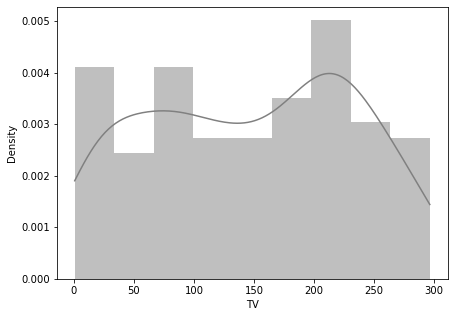

In [15]:
plt.figure(figsize=(7,5))
sea.histplot(df['TV'],color="grey",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

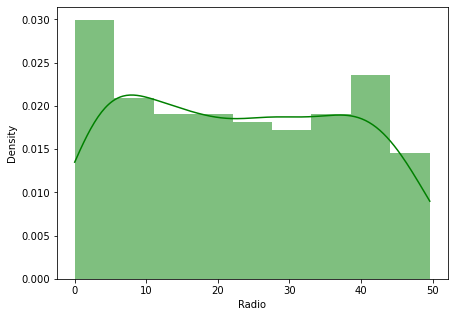

In [16]:
plt.figure(figsize=(7,5))
sea.histplot(df['Radio'],color="green",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

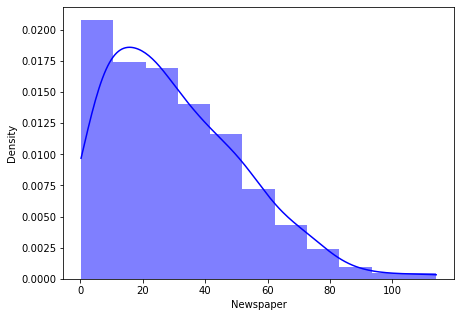

In [17]:
plt.figure(figsize=(7,5))
sea.histplot(df['Newspaper'],color="blue",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

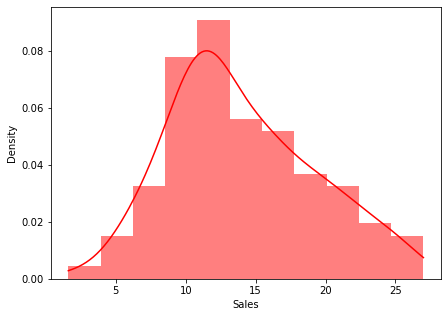

In [18]:
plt.figure(figsize=(7,5))
sea.histplot(df['Sales'],color="red",label="100% Equities",kde=True, stat="density",linewidth=0)
plt.show()

In [19]:
x= np.array(df.drop(labels=['Sales'], axis=1))

In [20]:
y=np.array(df['Sales'])

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state= 45)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)

shape of x_train (160, 3)
shape of y_train (160,)


In [22]:
reg = LinearRegression()

In [23]:
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
coefficient = reg.coef_
coefficient

array([ 0.04699362,  0.18346139, -0.00486456])

In [25]:
intercept = reg.intercept_
intercept

2.9856420427515786

In [26]:
pred = reg.predict(x_test)
compare = pd.DataFrame({"Actual_sales":list(y_test),"Predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,Predicted_sales
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521
5,9.7,8.926802
6,19.0,18.135673
7,11.8,11.365894
8,18.5,17.397555
9,8.5,8.669504


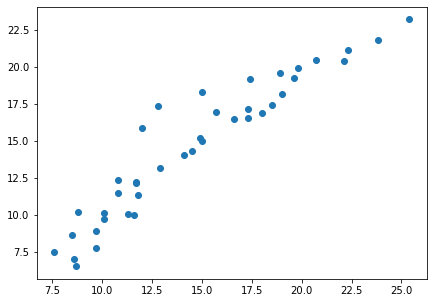

In [27]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, pred)

In [28]:
mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.08


In [29]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 2.26


In [30]:
rnse = np.sqrt(mse)
print(f'Root mean squared error: {rnse:.2f}')

Root mean squared error: 1.50
